<a href="https://colab.research.google.com/github/HassanSuhaib71/Task-6-House-Price-Prediction/blob/main/houseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn pandas numpy seaborn matplotlib opendatasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hassansuhaibabbasi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction


100%|██████████| 4.63k/4.63k [00:00<00:00, 11.8MB/s]

In [4]:
df = pd.read_csv("/content/housing-price-prediction/Housing.csv")  # You can use `!ls` to see actual filename if needed
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Convert categorical to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [6]:
X = df.drop("price", axis=1)
y = df["price"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)


In [10]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)


In [11]:
def evaluate(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

evaluate(y_test, lr_pred, "Linear Regression")
evaluate(y_test, gb_pred, "Gradient Boosting")


Linear Regression - MAE: 979679.69, RMSE: 1331071.42
Gradient Boosting - MAE: 962943.03, RMSE: 1301765.68


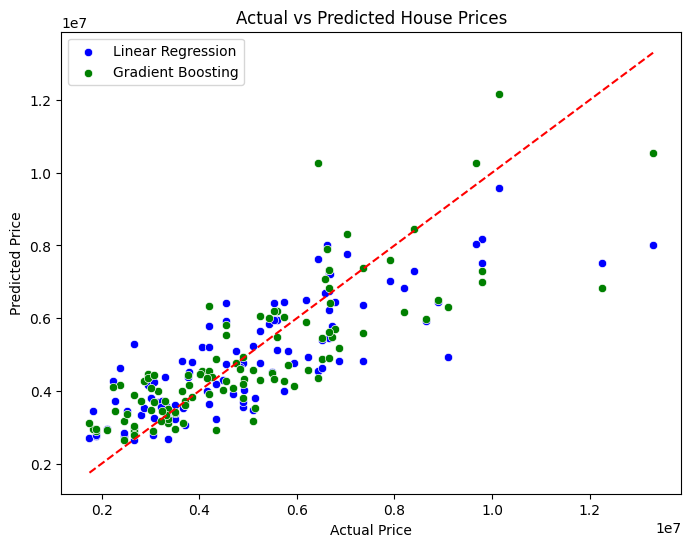

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=lr_pred, label="Linear Regression", color="blue")
sns.scatterplot(x=y_test, y=gb_pred, label="Gradient Boosting", color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()
